In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

In [34]:
# INFO: Your Parameters.
# You can adjust them after completing the lab
C = 1
kernel = 'linear'
iterations = 5000   # TODO: Change to 200000 once you get to Question#2

In [35]:
# INFO: You can set this to false if you want to
# draw the full square matrix
FAST_DRAW = True

In [36]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
  # INFO: A convenience function for you
  # You can use this to break any higher-dimensional space down
  # And view cross sections of it.

  # If this line throws an error, use plt.style.use('ggplot') instead
  mpl.style.use('ggplot') # Look Pretty

  padding = 3
  resolution = 0.5
  max_2d_score = 0

  y_colors = ['#ff0000', '#00ff00', '#0000ff']
  my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
  colors = [y_colors[i] for i in y_train]
  num_columns = len(X_train.columns)

  fig = plt.figure()
  fig.canvas.set_window_title(wintitle)
  
  cnt = 0
  for col in range(num_columns):
    for row in range(num_columns):
      # Easy out
      if FAST_DRAW and col > row:
        cnt += 1
        continue

      ax = plt.subplot(num_columns, num_columns, cnt + 1)
      plt.xticks(())
      plt.yticks(())

      # Intersection:
      if col == row:
        plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
        cnt += 1
        continue


      # Only select two features to display, then train the model
      X_train_bag = X_train.ix[:, [row,col]]
      X_test_bag = X_test.ix[:, [row,col]]
      model.fit(X_train_bag, y_train)

      # Create a mesh to plot in
      x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
      y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
      xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

      # Plot Boundaries
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())

      # Prepare the contour
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
      plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


      score = round(model.score(X_test_bag, y_test) * 100, 3)
      plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
      max_2d_score = score if score > max_2d_score else max_2d_score

      cnt += 1

  print ("Max 2D Score: ", max_2d_score)
  fig.set_tight_layout(True)

In [37]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print('\n\n' + wintitle + ' Results')
    s = time.time()
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:    
        model = model.fit(X_train, y_train) 
    print ("{0} Iterations Training Time: ".format(iterations), time.time() - s)

    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
        score = model.score(X_test, y_test)
    print ("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print ("High-Dimensionality Score: ", round((score*100), 3))

In [38]:
# TODO: Load up the wheat dataset into dataframe 'X'
# Verify you did it properly.
# Indices shouldn't be doubled, nor weird headers...
X = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/08_DAT_210x_Programming_with_Python_for_Data_Science/Module6/Datasets/wheat.data',
                index_col = 'id')
X

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,kama
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,kama
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,kama
7,14.11,14.10,0.8911,5.420,3.302,2.7000,NaN,canadian
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,kama


In [39]:
# INFO: An easy way to show which rows have nans in them
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


In [40]:
# TODO: Go ahead and drop any row with a nan
X = X.dropna()
X

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,kama
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,kama
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,kama
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,kama
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,kama


In [41]:
# INFO: # In the future, you might try setting the nan values to the
# mean value of that column, the mean should only be calculated for
# the specific class rather than across all classes, now that you
# have the labels

# TODO: Copy the labels out of the dset into variable 'y' then Remove
# them from X. Encode the labels, using the .map() trick we showed
# you in Module 5 -- canadian:0, kama:1, and rosa:2
y = X.wheat_type
y = y.map({'kama':0, 'canadian':1, 'rosa':2})
#y.unique()
y

id
0      0
1      0
2      0
3      0
4      0
5      0
6      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
      ..
179    1
180    1
181    1
182    1
183    1
184    1
185    1
186    1
187    1
188    1
189    1
190    1
191    1
192    1
193    1
194    1
195    1
196    1
197    1
198    1
199    1
200    1
202    1
203    1
204    1
205    1
206    1
207    1
208    1
209    1
Name: wheat_type, dtype: int64

In [42]:
del X['wheat_type']
X

,area,perimeter,compactness,length,width,asymmetry,groove
id,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533


In [43]:
# TODO: Split your data into test / train sets
# Your test size can be 30% with random_state 7.
# Use variable names: X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [44]:
# TODO: Create an SVC classifier named svc
# Use a linear kernel, and set the C value to C
from sklearn.svm import SVC
svc = SVC(kernel='linear', C = C)



KNeighbors Results
5000 Iterations Training Time:  6.691300392150879
5000 Iterations Scoring Time:  14.552339315414429
High-Dimensionality Score:  83.607
Max 2D Score:  90.164


SVC Results
5000 Iterations Training Time:  11.522507905960083
5000 Iterations Scoring Time:  5.53043270111084
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


Tree Results
5000 Iterations Training Time:  7.486856698989868
5000 Iterations Scoring Time:  4.1566596031188965
High-Dimensionality Score:  91.803
Max 2D Score:  90.164


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


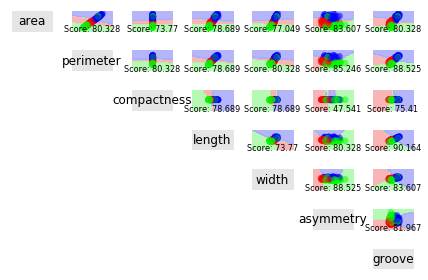

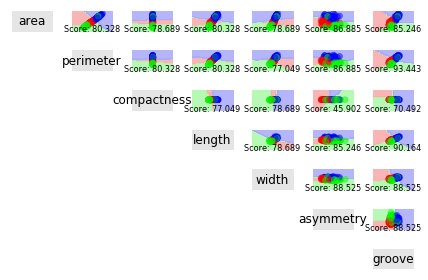

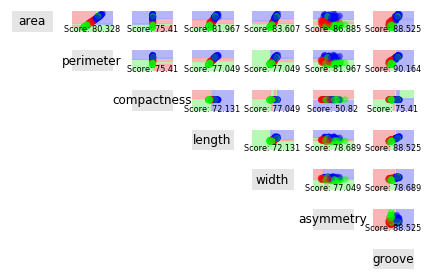

In [52]:
# TODO: Create an KNeighbors classifier named knn
# Set the neighbor count to 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#knn = knmodel.fit(X_train, y_train)

from sklearn import tree
Tree = tree.DecisionTreeClassifier(max_depth=5, random_state=2)

benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

benchmark(Tree, X_train, X_test, y_train, y_test, 'Tree')
drawPlots(Tree, X_train, X_test, y_train, y_test, 'SVC')

plt.show()